## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

## Loading file path

In [2]:
filepath = "D:\\CYBER ATTACK DETECTION PROJECT\\DATASET\\Final Dataset for comparision.csv"

In [3]:
# Loading the dataset

df = pd.read_csv(filepath, nrows=6000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
4,2.998560,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5741553 entries, 0 to 5741552
Data columns (total 26 columns):
 #   Column             Dtype  
---  ------             -----  
 0   duration           float64
 1   orig_bytes         int64  
 2   resp_bytes         int64  
 3   missed_bytes       float64
 4   orig_pkts          float64
 5   orig_ip_bytes      float64
 6   resp_pkts          float64
 7   resp_ip_bytes      float64
 8   label              object 
 9   misses_bytes       float64
 10  proto_icmp         int64  
 11  proto_tcp          int64  
 12  proto_udp          int64  
 13  conn_state_OTH     int64  
 14  conn_state_REJ     int64  
 15  conn_state_RSTO    int64  
 16  conn_state_RSTOS0  int64  
 17  conn_state_RSTR    int64  
 18  conn_state_RSTRH   int64  
 19  conn_state_S0      int64  
 20  conn_state_S1      int64  
 21  conn_state_S2      int64  
 22  conn_state_S3      int64  
 23  conn_state_SF      int64  
 24  conn_state_SH      int64  
 25  conn_state_SHR    

In [6]:
# statistical measures on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
count,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,...,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06,5.741553e+06
mean,3.142818e-01,6.856418e+02,5.371339e+00,3.746913e-02,4.549491e+01,1.980914e+03,3.706732e-02,8.321413e+00,-9.874159e-01,3.757868e-03,...,4.598059e-05,6.391999e-05,3.831716e-06,8.134508e-01,1.114681e-05,8.534276e-06,4.279330e-04,4.321479e-03,6.966756e-06,3.483378e-07
std,5.801527e+01,8.601501e+05,4.880814e+03,2.025883e+01,3.626892e+04,1.429308e+06,8.187426e+00,5.095195e+03,6.510143e+00,6.118617e-02,...,6.780744e-03,7.994743e-03,1.957473e-03,3.895492e-01,3.338666e-03,2.921336e-03,2.068212e-02,6.559577e-02,2.639452e-03,5.902014e-04
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,6.602735e+07,1.914793e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.shape

(5741553, 26)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH',
       'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0',
       'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1',
       'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
       'conn_state_SHR'],
      dtype='object')

In [9]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0
4,2.998560,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
df['label'].value_counts()

Okiru                         2626257
Benign                        1827145
DDoS                          1263025
C&C                             15520
Attack                           6943
C&C-HeartBeat                    2561
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

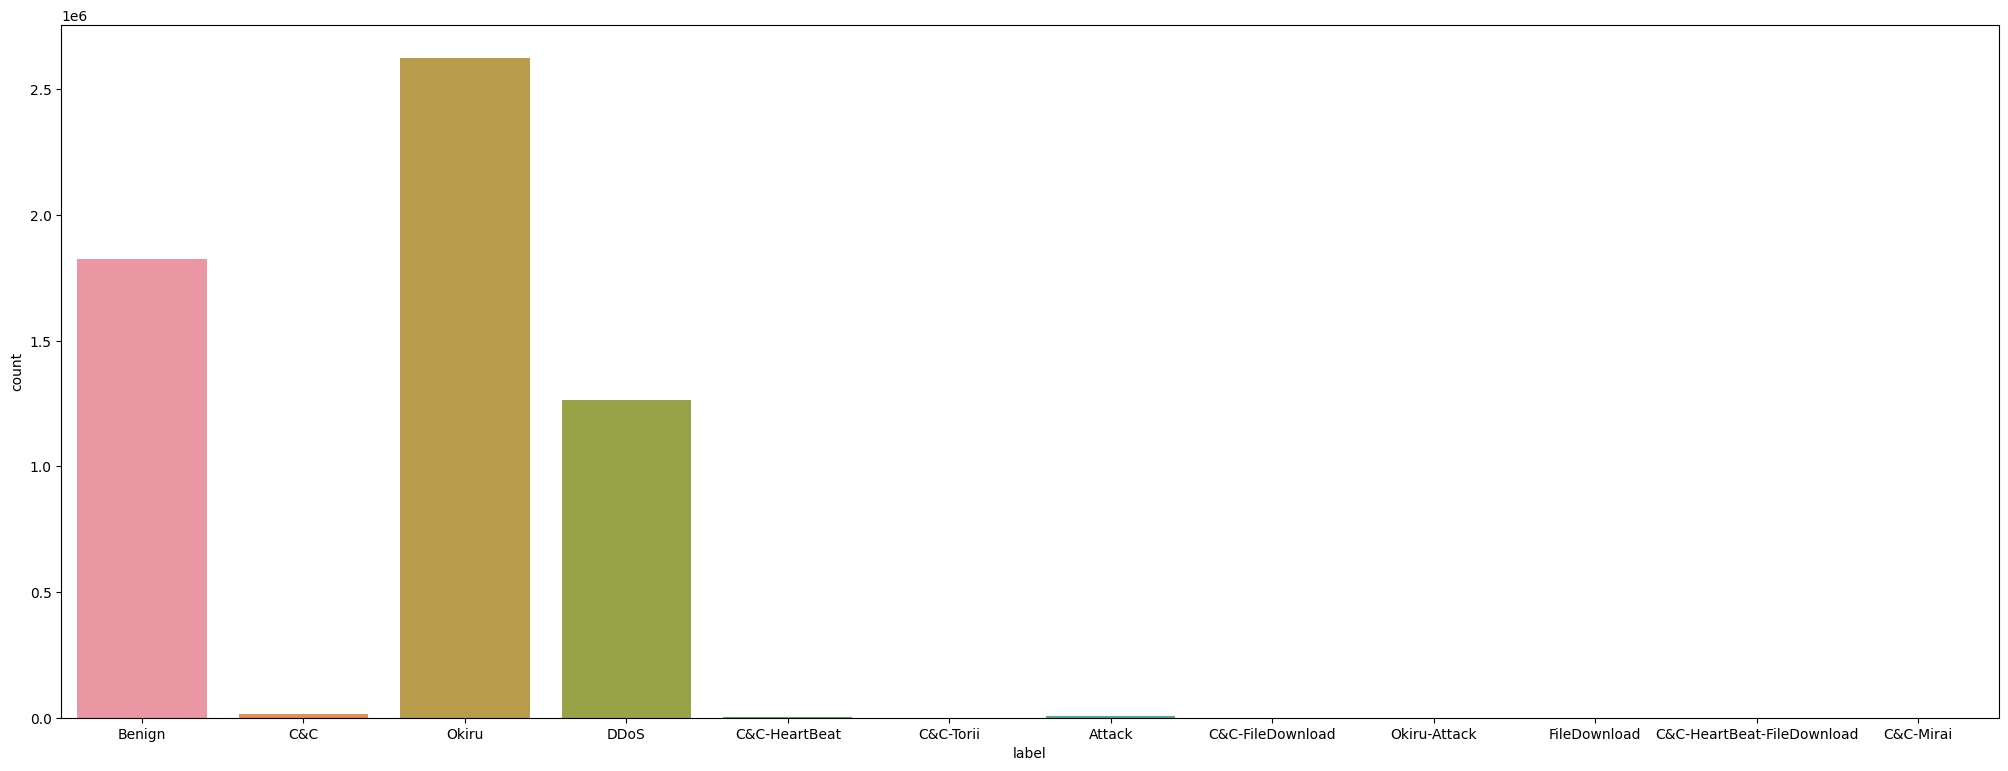

In [11]:
plt.figure(figsize = (25,9))
sns.countplot(x = df['label'])

In [12]:
df['label'] = df['label'].replace(['Okiru','Okiru-Attack','DDoS','C&C','Attack','C&C-HeartBeat','C&C-FileDownload','C&C-Torii','FileDownload','C&C-HeartBeat-FileDownload','C&C-Mirai'], 'Malignant')
df['label'].value_counts()

Malignant    3914408
Benign       1827145
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

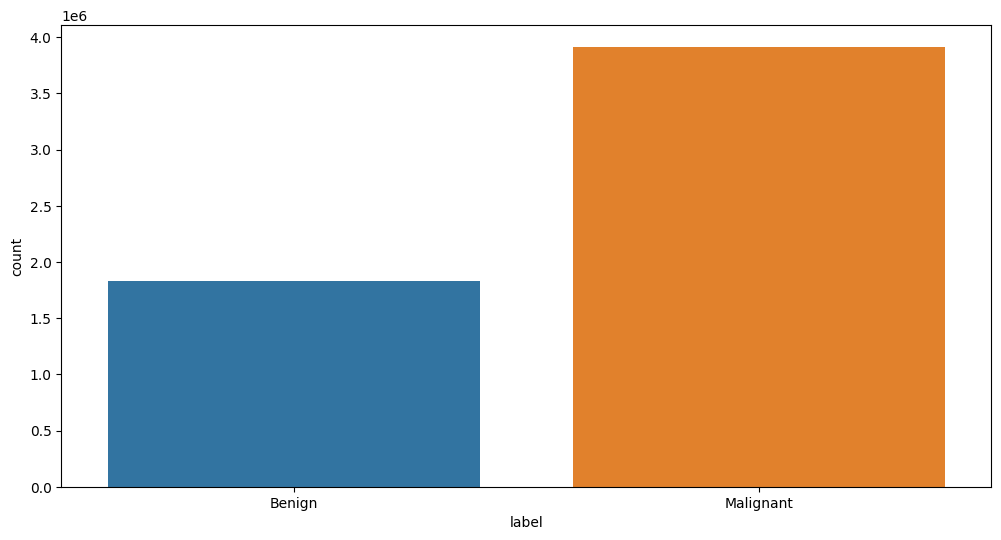

In [13]:
plt.figure(figsize = (12,6))
sns.countplot(x = df['label'])

In [14]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']

In [15]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_icmp
proto_tcp
proto_udp
conn_state_OTH
conn_state_REJ
conn_state_RSTO
conn_state_RSTOS0
conn_state_RSTR
conn_state_RSTRH
conn_state_S0
conn_state_S1
conn_state_S2
conn_state_S3
conn_state_SF
conn_state_SH
conn_state_SHR


In [16]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']


In [17]:
df['label'].value_counts()

Malignant    3914408
Benign       1827145
Name: label, dtype: int64

## Changing the labels into numerical columns

In [18]:
df['label'].head()

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
Name: label, dtype: object

In [19]:
# Creating a instance of lable Encoder

le = LabelEncoder()


label = le.fit_transform(df['label'])

label

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
df.drop("label", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
df["label"] = label

# printing Dataframe
df.head()


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,proto_icmp,...,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR,label
0,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,-1.0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,-1.0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.998560,0,0,0.0,3.0,180.0,0.0,0.0,-1.0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
df['label'].value_counts()

1    3914408
0    1827145
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

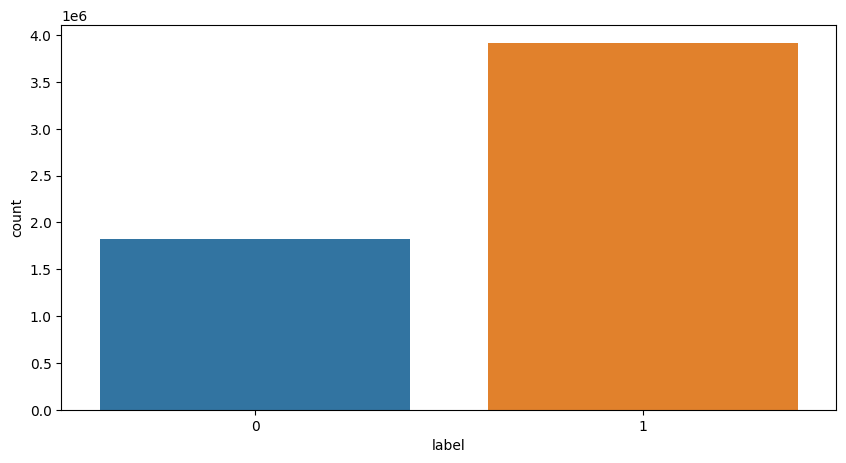

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['label'])

## Splitting the dataset into features and target

In [23]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]

# target
Y = df['label']

In [24]:
# shape of feature and target

print('Shape of feature : ',X.shape)
print('Shape of target : ',Y.shape)

Shape of feature :  (5741553, 25)
Shape of target :  (5741553,)


In [25]:
scaler = StandardScaler()

scaler.fit(X)
X_standard = scaler.transform(X)

In [26]:
print(X_standard)

[[ 0.04627268 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]
 [-0.00541723 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]
 [-0.00541723 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]
 ...
 [-0.00319969 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]
 [-0.00541723 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]
 [-0.00541723 -0.00079712 -0.0011005  ... -0.06588046 -0.00263947
  -0.0005902 ]]


## Splitting the dataset into features and target

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Training Random Forest Model

In [28]:
start = time.time()
rf = RandomForestClassifier()

# Fit the Random Forest model on the training data
rf.fit(X_train, Y_train)

# Make predictions on the test data
rf_pred = rf.predict(X_test)

# Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
rf_acc = accuracy_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_recall = recall_score(Y_test, rf_pred, average='macro', zero_division=1)
rf_precision = precision_score(Y_test, rf_pred, average='macro', zero_division=1)
end = time.time()

rf_time = end - start 

In [29]:
print('Random Forest Accuracy : ',rf_acc)
print('Random Forest F1 Score : ',rf_f1)
print('Random Forest Recall : ',rf_recall)
print('Random Forest Precision : ',rf_precision)
print('Random Forest Time : ',rf_time)

Random Forest Accuracy :  0.9400206041743047
Random Forest F1 Score :  0.9272019493717742
Random Forest Recall :  0.9073658199545559
Random Forest Precision :  0.9570218736755604
Random Forest Time :  520.1652052402496


## Printing Classification Report

In [30]:
print('Random Forest Classifier : ')
print(classification_report(Y_test, rf_pred, zero_division=1))

Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.99      0.82      0.90    365482
           1       0.92      1.00      0.96    782829

    accuracy                           0.94   1148311
   macro avg       0.96      0.91      0.93   1148311
weighted avg       0.94      0.94      0.94   1148311



## Making a Predicition System

In [31]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'misses_bytes',
       'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH',
       'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0',
       'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1',
       'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH',
       'conn_state_SHR', 'label'],
      dtype='object')

In [32]:
input_data = (-1,-1,-1,0,2,80,0,0,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0)

# changing data to numpy array 
input_data_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped =  input_data_array.reshape(1,-1)


# standarize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


result = rf.predict(std_data)
print("The prediction is : ",result)

if (result[0] == 0):
  print("No Attack has been found.")
else:
  print("Attack has been found")

[[-0.02265407 -0.00079828 -0.00130538 -0.00184952 -0.00119923 -0.00132995
  -0.00452735 -0.00163319 -0.00193299 -0.06141696  0.29030412 -0.28262423
  -0.46902389 -0.03588724 -0.00748903 -0.00678105 -0.00799525 -0.00195748
   0.47888476 -0.0033387  -0.00292136 -0.02069097 -0.06588046 -0.00263947
  -0.0005902 ]]
The prediction is :  [0]
No Attack has been found.


C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\aksha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Making Y_train and rf_pred same number of sample

In [33]:
print(Y_train.shape)
print(rf_pred.shape)

(4593242,)
(1148311,)


In [34]:
Y_train = Y_train[:rf_pred.shape[0]]

In [35]:
print(Y_train.shape)
print(rf_pred.shape)

(1148311,)
(1148311,)


## Confusion Matrix

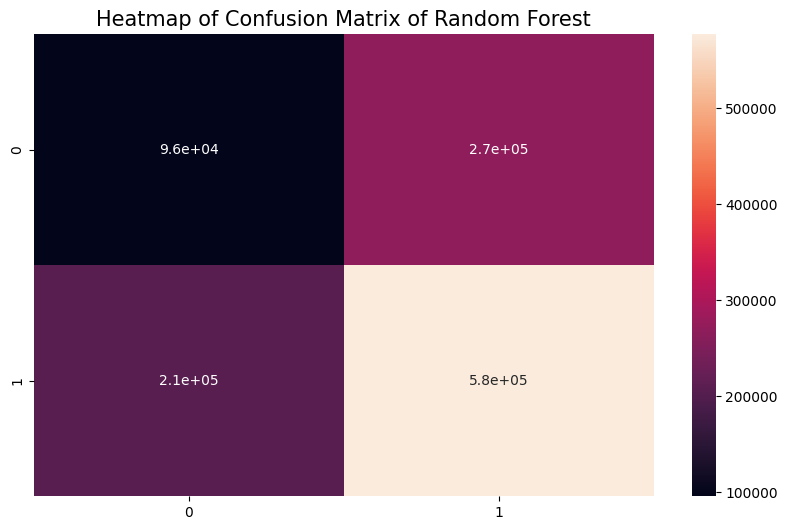

In [36]:
plt.figure(figsize = (10,6))
cm = confusion_matrix(Y_train, rf_pred)
plt.title('Heatmap of Confusion Matrix of Random Forest', fontsize = 15)
sns.heatmap(cm, annot= True)
plt.show()

In [37]:
import pickle 
# importing the library

filename = "trained_model.pkl"
pickle.dump(rf, open(filename, 'wb'))
# saving file